# Text Classification
The comma separated values (csv) file is used to perform sentiment analysis on text data of reviews. The scores of 1-5 were given in the csv file. We have considered 3 as neutral, less than 3 as negative and greater than 3 as positive. 

**Note    
Their are few things which can be improved but due to timing constraint, I am unable to do them. However, I am mentionening those possible tasks for improvement**  
1) Data Cleaning - Removal of Special characters etc  
2) Data augmentation - To reduce imbalance in the dataset  
3) K-fold cross validation to get the better model  
4) Try different architectures and select the model  
**This code was initially tested on some part of dataset. On complete dataset, the label assignment part is taking too long to execute. I am leaving this part for now. The results available at the end of notebook were calculated on less data.**

In [1]:
import pandas as pd

In [2]:
col_list = ['ProfileName','Score','Summary']
csv_file = pd.read_csv('Reviews.csv',usecols=col_list)

In [3]:
csv_file.head()

,ProfileName,Score,Summary
0,delmartian,5,Good Quality Dog Food
1,dll pa,1,Not as Advertised
2,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all"
3,Karl,2,Cough Medicine
4,"Michael D. Bigham ""M. Wassir""",5,Great taffy


In [4]:
csv_file.count()

ProfileName    23023
Score          23023
Summary        23023
dtype: int64

**Data Cleaning**  
Some of the Score values were non interger so we have removed those records from csv file.

In [5]:
index = []
for i, row in csv_file.iterrows():
    if not str(row['Score']).isdigit():
        index.append(i)
for ind in index:
    csv_file = csv_file.drop(ind)

**Label Assignment**

In [6]:
for idx, val in enumerate(csv_file.itertuples()):
    if int(csv_file.Score[idx]) > 3:
        csv_file.loc[idx, 'Label'] = 'Positive'
    elif int(csv_file.Score[idx]) < 3:
        csv_file.loc[idx, 'Label'] = 'Negative'
    else:
        csv_file.loc[idx, 'Label'] = 'Neutral'
    


In [7]:
csv_file.head()

,ProfileName,Score,Summary,Label
0,delmartian,5,Good Quality Dog Food,Positive
1,dll pa,1,Not as Advertised,Negative
2,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",Positive
3,Karl,2,Cough Medicine,Negative
4,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Positive


In [8]:
csv_file.count()

ProfileName    23023
Score          23023
Summary        23023
Label          23023
dtype: int64

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='Label', ylabel='count'>

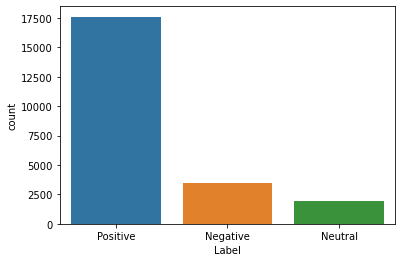

In [10]:
# Histogram
sns.countplot(x='Label',data=csv_file)

In [11]:
# Function which directly tokenize the tweet data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
csv_file['Summary'].apply(tt.tokenize)

0                               [Good, Quality, Dog, Food]
1                                    [Not, as, Advertised]
2                           [", Delight, ", says, it, all]
3                                        [Cough, Medicine]
4                                           [Great, taffy]
                               ...                        
23018                     [Surpassed, my, expectations, .]
23019                           [Strong, and, Not, Bitter]
23020                              [Try, a, cup, or, more]
23021               [Mellow, Rich, French, Roast, +, +, +]
23022    [Can't, Tell, The, Difference, From, Regular, ...
Name: Summary, Length: 23023, dtype: object

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [13]:
def tokenize(text):
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

In [14]:
# apply tokenize function
csv_file['text'] = csv_file['Summary'].apply(tokenize)

In [15]:
csv_file.head()

,ProfileName,Score,Summary,Label,text
0,delmartian,5,Good Quality Dog Food,Positive,"[Good, Quality, Dog, Food]"
1,dll pa,1,Not as Advertised,Negative,"[Not, as, Advertised]"
2,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",Positive,"[``, Delight, '', says, it, all]"
3,Karl,2,Cough Medicine,Negative,"[Cough, Medicine]"
4,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Positive,"[Great, taffy]"


In [16]:
from collections import Counter
words = Counter()
for idx in csv_file.index:
    words.update(csv_file.loc[idx, "text"])

words.most_common(5)

[('!', 7785), (',', 2566), ('Great', 2052), ('.', 1706), ('for', 1613)]

In [17]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /home/abdul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
whitelist = ["n't", "not"]
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(5)

[('!', 7785), (',', 2566), ('Great', 2052), ('.', 1706), ('good', 1086)]

In [19]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    #print(whitelist)
    
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "text"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [20]:
word_list(csv_file)

In [21]:
words = pd.read_csv("wordlist.csv")

In [22]:
import os

In [23]:
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in csv_file.index:
    current_row = []
    
    # add label
    current_label = csv_file.loc[idx, "Label"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(csv_file.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)


bow = data_model

In [24]:
data_model.head()

,label,taste_bow,dog_bow,n't_bow,Love_bow,best_bow,Delicious_bow,-_bow,like_bow,Excellent_bow,...,Need_bow,pouches_bow,Feast_bow,Tierra_bow,Hours_bow,Tug-a-Jug_bow,toys_bow,jug_bow,Rope_bow,interest_bow
0,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    log("")
    log("---------------------------------------------------------")
    log("Testing " + str(type(classifier).__name__))
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    log("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    log("Predicting time {0}s".format(time() - now))

    # Calculate Accuracy, Precision, recall
    
    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    
    log("=================== Results ===================")
    log("            Negative     Neutral     Positive")
    log("F1       " + str(f1))
    log("Precision" + str(precision))
    log("Recall   " + str(recall))
    log("Accuracy " + str(accuracy))
    log("===============================================")

    return precision, recall, accuracy, f1

def log(x):
    #can be used to write to log file
    print(x)

In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(bow.iloc[:, 1:], bow['label'], test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 0.48178577423095703s
Predicting time 0.23952317237854004s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.4960981  0.24099379 0.88773963]
Precision[0.60298103 0.38955823 0.84087838]
Recall   [0.42140152 0.17446043 0.9401322 ]
Accuracy 0.7991892283190966
